In [3]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [4]:
df=pd.read_csv("Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
df.shape #displays the number of rows and columns
print("The dataset has {} rows" .format(df.shape[0]))
print("The dataset has {} columns" .format(df.shape[1]))
print(df.shape)

The dataset has 2938 rows
The dataset has 22 columns
(2938, 22)


In [6]:
df.info() #Diplays information about the dataset including non-null values, datatype, etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
df.isna().mean().round(4) * 100

Country                             0.00
Year                                0.00
Status                              0.00
Life expectancy                     0.34
Adult Mortality                     0.34
infant deaths                       0.00
Alcohol                             6.60
percentage expenditure              0.00
Hepatitis B                        18.82
Measles                             0.00
 BMI                                1.16
under-five deaths                   0.00
Polio                               0.65
Total expenditure                   7.69
Diphtheria                          0.65
 HIV/AIDS                           0.00
GDP                                15.25
Population                         22.19
 thinness  1-19 years               1.16
 thinness 5-9 years                 1.16
Income composition of resources     5.68
Schooling                           5.55
dtype: float64

In [9]:
df['Life expectancy '] = df['Life expectancy '].fillna(df['Life expectancy '].mean())
df['Adult Mortality'] = df['Adult Mortality'].fillna(df['Adult Mortality'].mean())
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].mean())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].mean())
df[' BMI '] = df[' BMI '].fillna(df[' BMI '].mean())
df['Total expenditure'] = df['Total expenditure'].fillna(df['Total expenditure'].mean())
df['Polio'] = df['Polio'].fillna(df['Polio'].mean())
df['Diphtheria '] = df['Diphtheria '].fillna(df['Diphtheria '].mean())
df['GDP'] = df['GDP'].fillna(df['GDP'].mean())
df['Population'] = df['Population'].fillna(df['Population'].mean())
df[' thinness  1-19 years'] = df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].mean())
df[' thinness 5-9 years'] = df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].mean())
df['Income composition of resources'] = df['Income composition of resources'].fillna(df['Income composition of resources'].mean())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())

In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
#Counting the number of developed and developing countries in the dataset to see which has more instance
#The one with more instances is given label 1 and lesser instances is given label 0

df.groupby('Status').count()['Life expectancy ']#.plot(kind = 'bar')

Status
Developed      512
Developing    2426
Name: Life expectancy , dtype: int64

# Exploratory Data Analysis

In [12]:
low_life =df.groupby('Country').mean().nsmallest(10, ['Life expectancy ']).reset_index()
low_life

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Sierra Leone,2007.5,46.11250,357.8125,27.5625,3.245179,29.105579,82.348952,673.8750,18.30625,...,71.7500,9.013012,72.1250,1.51875,271.505561,3.336265e+06,7.68125,7.10000,0.361812,8.231250
1,Central African Republic,2007.5,48.51250,333.0625,16.5000,1.442054,40.905543,64.154009,699.4375,17.08750,...,41.3125,4.158012,42.4375,8.98125,363.055905,2.016546e+06,7.10625,7.08750,0.335500,6.237500
2,Lesotho,2007.5,48.78125,550.0625,4.5000,2.243929,82.118913,74.676336,266.6875,25.23750,...,67.9375,7.503012,79.4375,22.96875,794.523010,1.200528e+06,7.18750,7.06875,0.456813,10.656250
3,Angola,2007.5,49.01875,328.5625,83.7500,5.669554,102.100268,74.911452,3561.3125,18.01875,...,46.1250,4.045512,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.043750
4,Malawi,2007.5,49.89375,424.4375,37.1250,1.149554,25.849706,88.492558,7559.4375,16.78125,...,89.0625,6.613637,83.6250,16.68125,237.504042,6.700263e+06,7.11875,6.98750,0.410625,10.231250
5,Chad,2007.5,50.38750,227.7500,44.8750,0.673304,32.277320,55.407731,4687.7500,16.31875,...,32.8750,4.476762,26.8125,4.33750,484.791694,4.114092e+06,7.14375,7.04375,0.316625,6.087500
6,Côte d'Ivoire,2007.5,50.38750,417.3125,61.5000,2.947679,0.000000,64.996279,1708.2500,21.32500,...,65.9375,5.736762,68.9375,4.68750,7483.158469,1.275338e+07,6.73750,6.69375,0.627551,11.992793
7,Zimbabwe,2007.5,50.48750,462.3750,26.5625,4.489554,20.364271,70.562500,923.0000,25.13750,...,75.6250,6.144887,75.1875,23.26250,410.980194,8.021343e+06,7.01250,6.98750,0.439125,9.825000
8,Swaziland,2007.5,51.32500,339.0000,2.6250,4.472054,278.099713,76.000000,49.1250,25.50000,...,89.0000,7.223012,83.7500,32.94375,2165.090837,4.573031e+05,6.47500,6.63125,0.515687,10.350000
9,Nigeria,2007.5,51.35625,248.5000,535.6875,8.393929,85.444275,54.793894,51653.9375,19.75000,...,41.3125,3.849887,39.3125,4.83125,1360.139877,7.087700e+07,10.41875,10.36875,0.367375,9.000000


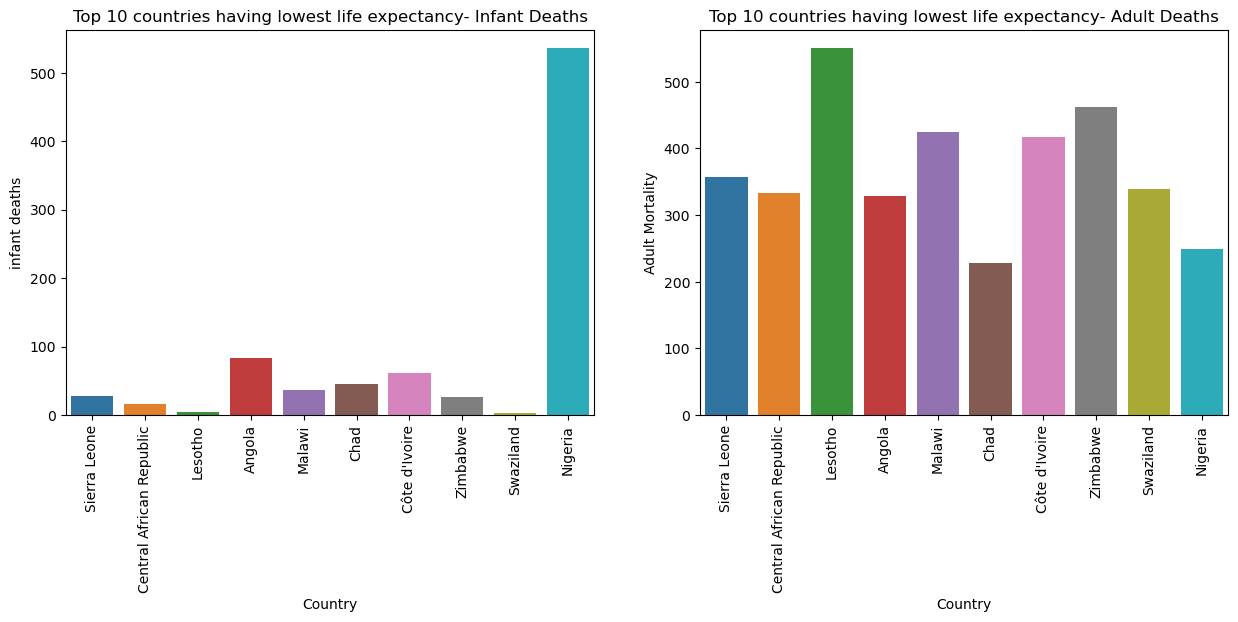

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
infant = sb.barplot(data = low_life, x = low_life.Country, y = low_life['infant deaths'])
infant.set_title("Top 10 countries having lowest life expectancy- Infant Deaths")
infant.set_xticklabels(infant.get_xticklabels(), rotation = 90)

plt.subplot(1,2,2)
adult = sb.barplot(data = low_life, x = low_life.Country, y = low_life['Adult Mortality'])
adult.set_title("Top 10 countries having lowest life expectancy- Adult Deaths")
adult.set_xticklabels(adult.get_xticklabels(), rotation = 90)


plt.show()

In [14]:
#Top 10 Countries with lowest schooling and their lifespan

low_school =df.groupby('Country').mean().nsmallest(10, ['Schooling']).reset_index()
low_school

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Marshall Islands,2013.0,69.224932,164.796448,0.0000,0.010000,871.878317,8.000000,0.0000,81.600000,...,79.000000,17.240000,79.000000,0.10000,3617.752354,1.275338e+07,0.100000,0.100000,0.627551,0.00000
1,Tuvalu,2013.0,69.224932,164.796448,0.0000,0.010000,78.281203,9.000000,0.0000,79.300000,...,9.000000,16.610000,9.000000,0.10000,3542.135890,1.819000e+03,0.200000,0.100000,0.627551,0.00000
2,South Sudan,2007.5,53.875000,346.312500,27.7500,4.602861,8.241077,77.819182,315.7500,38.321247,...,70.503255,5.332904,71.285307,3.69375,4287.696050,3.750827e+06,4.839704,4.870317,0.131687,1.53125
3,Niger,2007.5,56.981250,232.437500,52.8125,0.373304,19.099369,72.029009,15467.1250,16.362500,...,52.937500,6.537387,52.312500,1.16250,259.782441,1.124072e+07,9.025000,8.912500,0.298125,4.01875
4,Djibouti,2007.5,60.756250,274.687500,1.4375,1.003929,98.838448,79.286452,113.8750,26.250000,...,74.875000,6.999887,75.125000,3.28125,897.999871,6.341162e+05,5.843750,5.700000,0.418438,4.75000
5,Eritrea,2007.5,60.687500,308.625000,6.3125,0.857679,6.436069,85.742558,175.0000,15.156250,...,87.812500,3.623012,82.250000,1.21250,2065.336135,4.742283e+06,8.081250,8.018750,0.255312,4.92500
6,Burkina Faso,2007.5,55.643750,252.500000,44.7500,4.263929,52.045581,81.040173,5091.7500,15.500000,...,69.000000,6.031762,77.312500,1.83750,410.372034,6.143695e+06,7.418750,6.981250,0.229687,5.40625
7,Chad,2007.5,50.387500,227.750000,44.8750,0.673304,32.277320,55.407731,4687.7500,16.318750,...,32.875000,4.476762,26.812500,4.33750,484.791694,4.114092e+06,7.143750,7.043750,0.316625,6.08750
8,Central African Republic,2007.5,48.512500,333.062500,16.5000,1.442054,40.905543,64.154009,699.4375,17.087500,...,41.312500,4.158012,42.437500,8.98125,363.055905,2.016546e+06,7.106250,7.087500,0.335500,6.23750
9,Sudan,2007.5,61.825000,240.312500,64.6250,1.654554,97.698443,75.043894,3108.0000,38.321247,...,72.250000,5.710512,72.375000,0.25000,1192.797953,1.804652e+07,4.839704,4.870317,0.441000,6.37500


In [15]:
#Top 10 Countries with highest schooling and their lifespan

high_school = df.groupby('Country').mean().nlargest(10, ['Schooling']).reset_index()
high_school

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Australia,2007.5,81.81250,63.1875,1.00,9.808304,5332.226473,92.621279,103.9375,55.86250,...,86.7500,8.655512,86.8750,0.1,34637.565047,4.587010e+06,0.66875,0.62500,0.918125,20.03750
1,New Zealand,2007.5,81.33750,71.5000,0.00,9.166250,2922.147780,70.187500,94.9375,56.62500,...,89.1250,8.692387,70.6250,0.1,14775.554807,1.275338e+07,0.31250,0.30000,0.891188,18.86875
2,Iceland,2007.5,82.44375,49.3750,0.00,7.287054,4991.595308,80.940461,0.0000,51.07500,...,89.7500,8.383012,89.7500,0.1,30159.502907,1.861776e+05,0.95625,0.90000,0.885313,18.15625
3,Ireland,2007.5,80.15000,72.4375,0.00,12.150804,4867.312605,83.150288,174.5000,53.68750,...,86.1250,7.616762,86.1250,0.1,33835.272005,3.599795e+06,0.30000,0.21875,0.891500,17.65625
4,Norway,2007.5,81.79375,66.2500,0.00,6.234375,4658.813918,80.940461,6.3125,50.81250,...,93.0625,8.889262,87.9375,0.1,27434.946928,2.614432e+06,0.76250,0.70000,0.931438,17.46875
5,Finland,2007.5,80.71250,68.8750,0.00,9.243304,2889.315470,80.940461,2.8125,52.30000,...,97.1875,8.446762,98.2500,0.1,25268.649758,3.493082e+06,0.90000,0.80625,0.872938,17.29375
6,Denmark,2007.5,79.25625,66.0625,0.00,10.326429,5313.335794,80.940461,15.7500,55.82500,...,88.0000,7.704887,88.0000,0.1,33067.407916,4.260081e+06,1.16250,0.93750,0.899875,17.19375
7,Netherlands,2007.5,81.13125,61.6250,1.00,8.581429,3805.687048,70.709067,251.9375,53.96875,...,96.8125,7.066137,96.8125,0.1,34964.719797,9.775704e+06,1.02500,0.96250,0.899750,17.05625
8,Belgium,2007.5,80.68125,70.1875,0.25,10.640179,2392.432657,74.500000,81.5625,50.89375,...,97.7500,5.960512,97.3125,0.1,16915.306000,2.884043e+06,0.86250,0.85625,0.877750,16.78750
9,Germany,2007.5,81.17500,71.2500,2.50,11.189554,3900.890261,77.437500,1497.1875,51.99375,...,94.8125,4.189887,89.8750,0.1,24337.749100,3.875735e+07,1.11875,1.10625,0.894500,16.60000


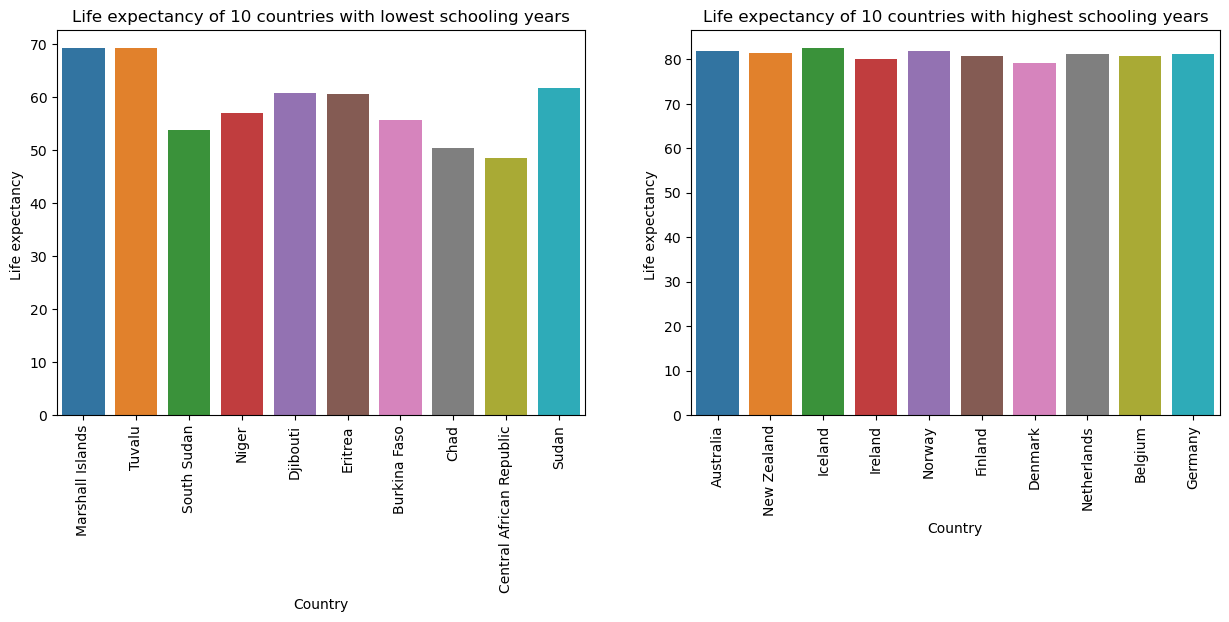

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
school_low = sb.barplot(data = low_school, x = low_school.Country, y = low_school['Life expectancy '])
school_low.set_title("Life expectancy of 10 countries with lowest schooling years")
school_low.set_xticklabels(school_low.get_xticklabels(), rotation = 90)

plt.subplot(1,2,2)
school_high = sb.barplot(data = high_school, x = high_school.Country, y = high_school['Life expectancy '])
school_high.set_title("Life expectancy of 10 countries with highest schooling years")
school_high.set_xticklabels(school_high.get_xticklabels(), rotation = 90)


plt.show()

In [17]:
print(low_school['Life expectancy '].mean()) #Avg life expectancy for low schooling years countries
print(high_school['Life expectancy '].mean()) #Avg life expectancy for high schooling years countries

58.71186133879784
81.049375


In [18]:
#Top 10 Countries with lowest and highest populations
low_pop = df.groupby('Country').mean().nsmallest(10, ['Population']).reset_index()
high_pop =df.groupby('Country').mean().nlargest(10, ['Population']).reset_index()


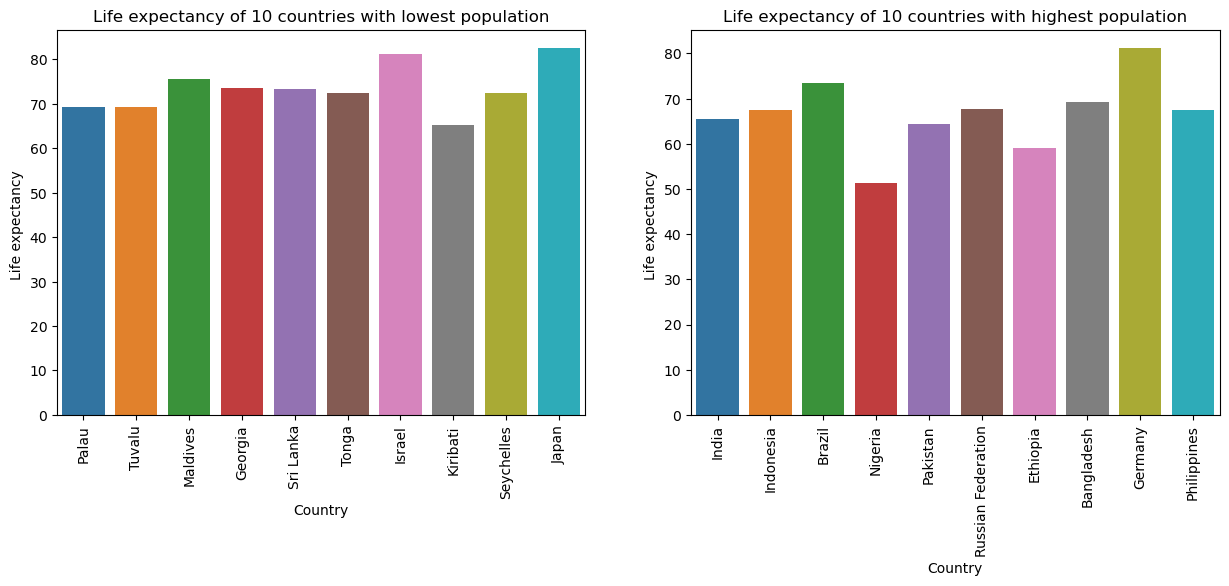

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
pop_low = sb.barplot(data = low_pop, x = low_pop.Country, y = low_pop['Life expectancy '])
pop_low.set_title("Life expectancy of 10 countries with lowest population")
pop_low.set_xticklabels(pop_low.get_xticklabels(), rotation = 90)

plt.subplot(1,2,2)
pop_high = sb.barplot(data = high_pop, x = high_pop.Country, y = high_pop['Life expectancy '])
pop_high.set_title("Life expectancy of 10 countries with highest population")
pop_high.set_xticklabels(pop_high.get_xticklabels(), rotation = 90)


plt.show()

In [20]:
print(low_pop['Life expectancy '].mean()) #Avg life expectancy for 10  low population countries
print(high_pop['Life expectancy '].mean()) #Avg life expectancy for 10  high populationcountries

73.47873633879782
66.71375


<AxesSubplot: >

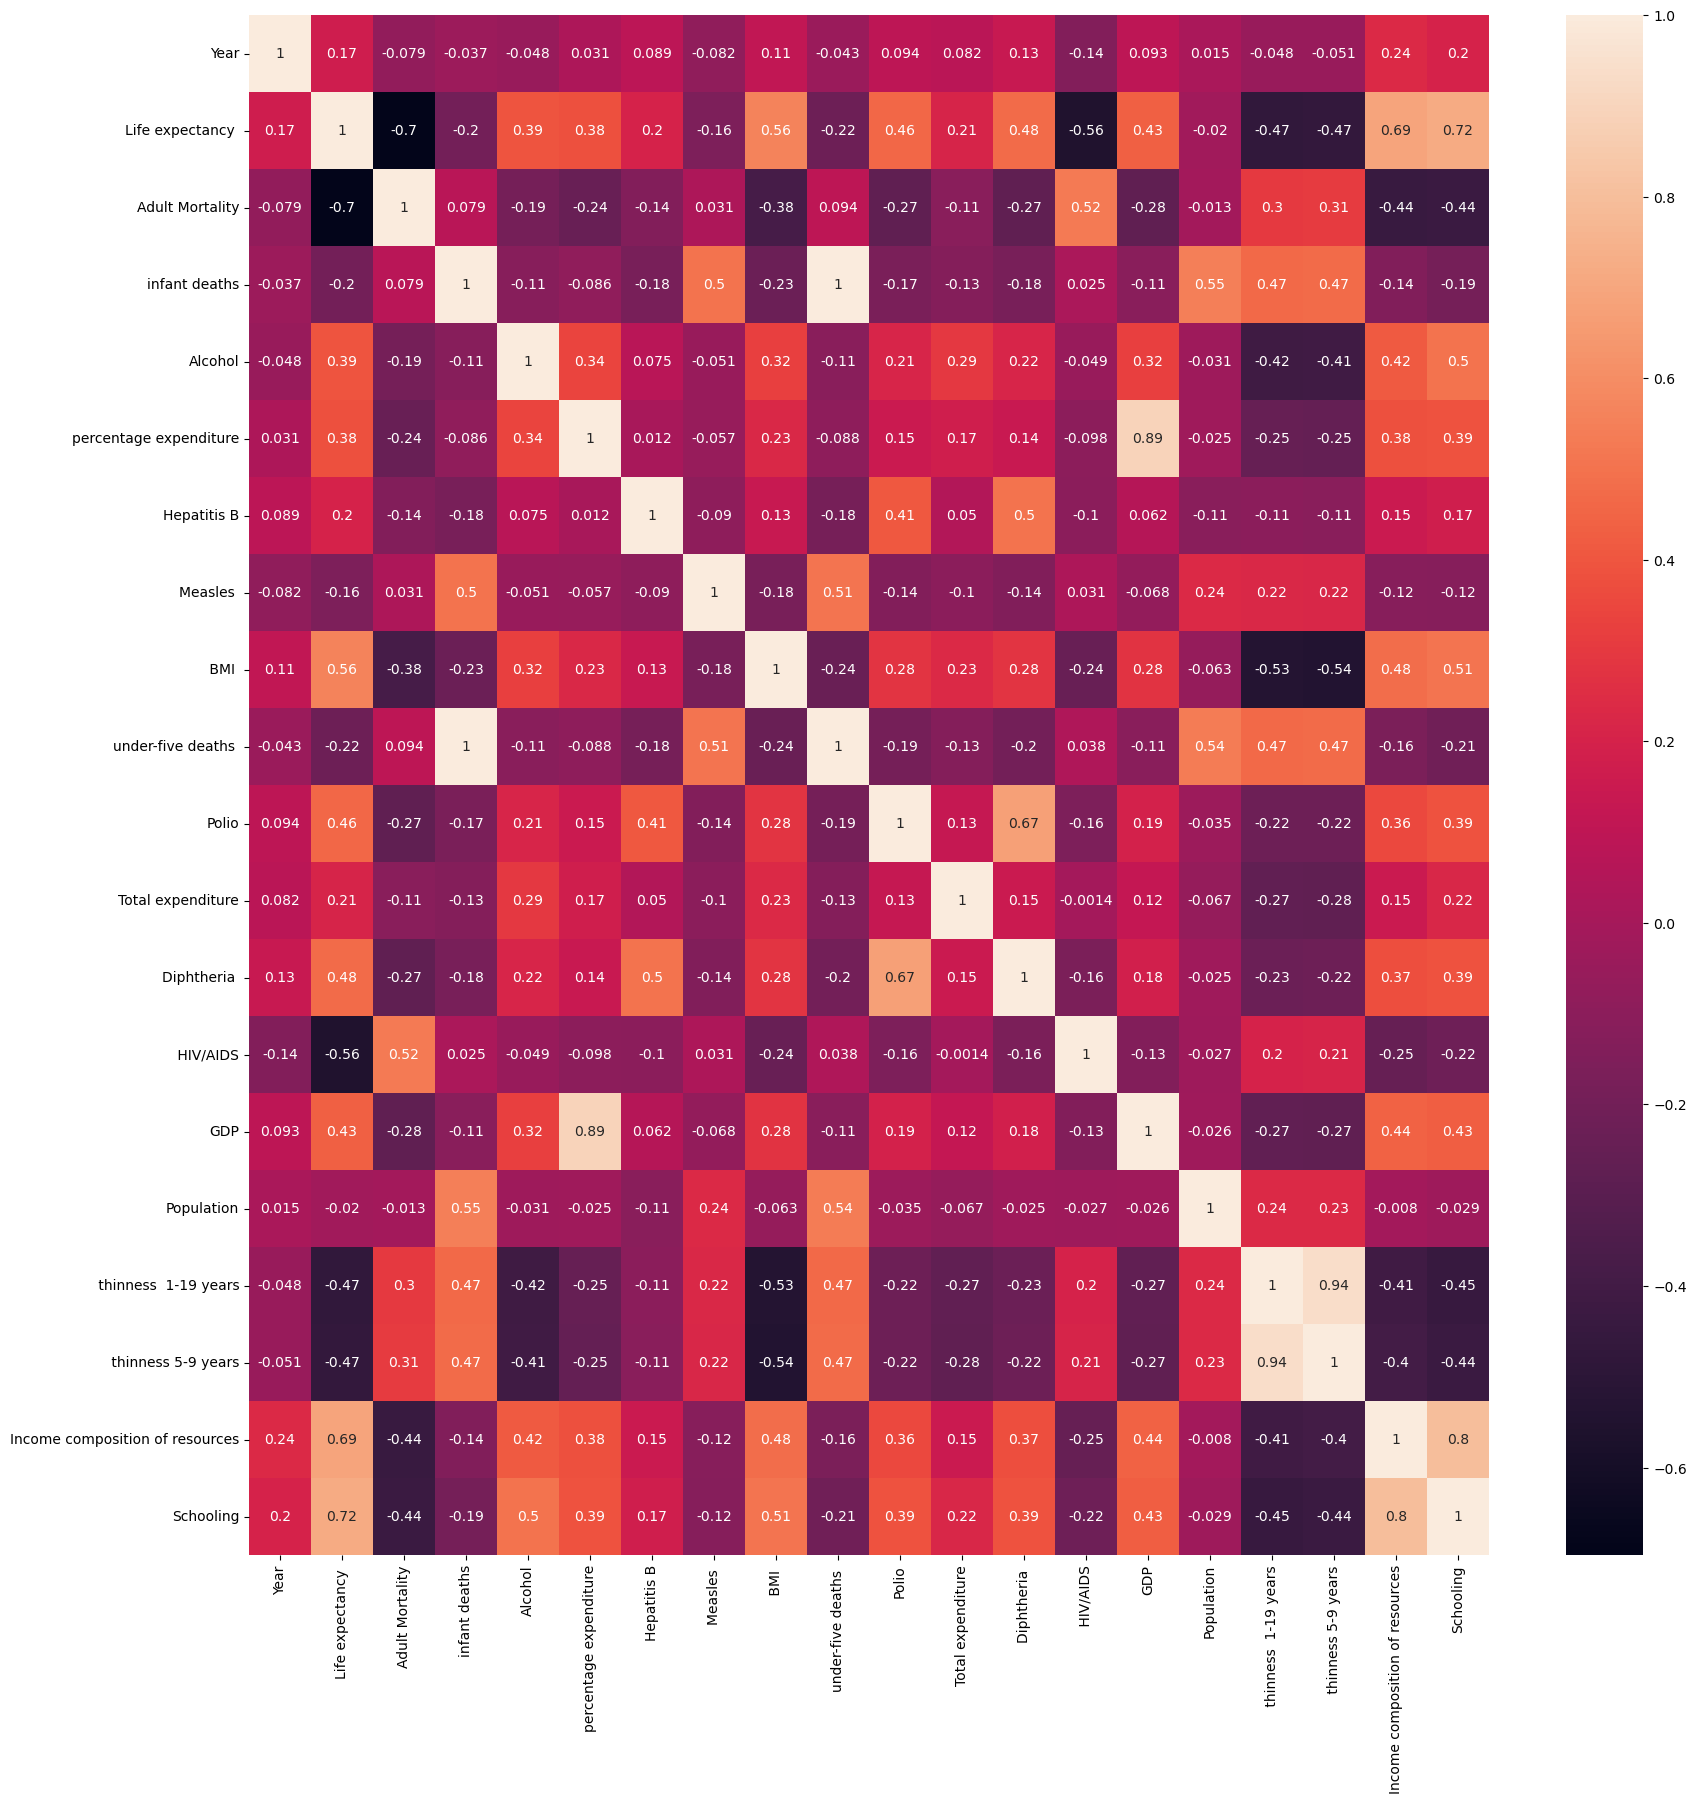

In [21]:
fig, ax = plt.subplots(figsize = (20,20)) 

corr =df.corr() 
sb.heatmap(corr, annot = True)

In [22]:
df.drop(columns=['under-five deaths ',' thinness 5-9 years','Country','Status'],axis =1, inplace=True)

In [23]:
#Life_Expectancy is the target feature y. X is the featureset.
X = df.drop(['Life expectancy '],axis =1)
y = df['Life expectancy ']

In [24]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [26]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape:  (2056, 17)
y_train shape:  (2056,)
X_test shape:  (882, 17)
y_test shape (882,)


Text(0, 0.5, 'Accuracy')

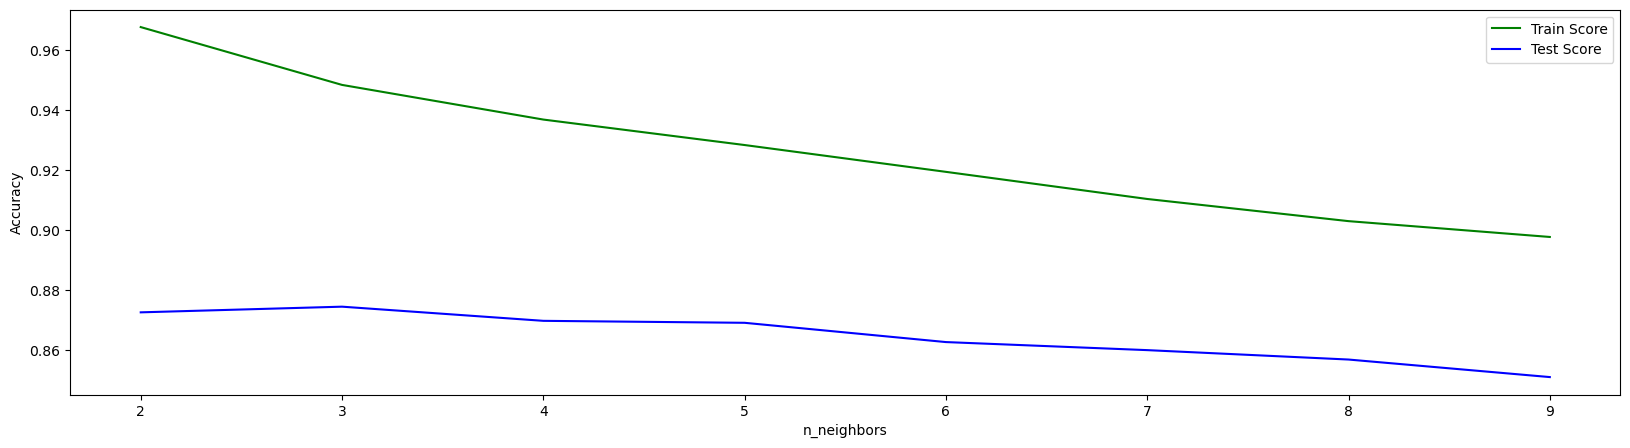

In [27]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(2,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(2,10)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

In [28]:
train_score_np = np.array(train_score_array)
test_score_np = np.array(test_score_array)
print('Train score',train_score_array)
print('Test score',test_score_array)
difference = train_score_np - test_score_np
print('Difference',difference)

Train score [0.9677959878131756, 0.9485004191951846, 0.9369365373784518, 0.9284371785490534, 0.9194875802342883, 0.9104361010806, 0.9030410196699057, 0.8977603379643354]
Test score [0.8726072196409762, 0.874499636928963, 0.8697734975189959, 0.8691173858624375, 0.8626860287026458, 0.859998185923824, 0.8568585192290327, 0.8510045093680315]
Difference [0.09518877 0.07400078 0.06716304 0.05931979 0.05680155 0.05043792
 0.0461825  0.04675583]


In [29]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score: {:.4f}'.format(lreg.score(X_train, y_train)))
print('Test Score:{:.4f}'.format(lreg.score(X_test, y_test)))

Train Score: 0.8079
Test Score:0.8066


In [30]:
from sklearn import metrics

ylinear_predicted = lreg.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test,ylinear_predicted))
print('R2_score: {:.4f}'.format(metrics.r2_score(y_test,ylinear_predicted)))

MSE: 17.259036340012926
R2_score: 0.8066


# CLASSIFICATION

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [32]:
df=pd.read_csv("Life Expectancy Data.csv")

In [33]:
df.drop('Country', axis=1, inplace=True)

In [34]:
df = pd.get_dummies(df, columns=['Status'], drop_first=True)

In [35]:
# Drop rows with missing values (or fillna alternatively)
df.dropna(inplace=True)

In [36]:
# Create a new binary classification target: High Life Expectancy (1 if >= 70)
df['High_Life_Expectancy'] = (df['Life expectancy '] >= 70).astype(int)

In [37]:
# Separate features and target
X = df.drop(['Life expectancy ', 'High_Life_Expectancy'], axis=1)
y = df['High_Life_Expectancy']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [41]:
# Make predictions
y_pred = knn.predict(X_test_scaled)

In [42]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[121  13]
 [  5 191]]


In [43]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       134
           1       0.94      0.97      0.95       196

    accuracy                           0.95       330
   macro avg       0.95      0.94      0.94       330
weighted avg       0.95      0.95      0.95       330



In [44]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9454545454545454


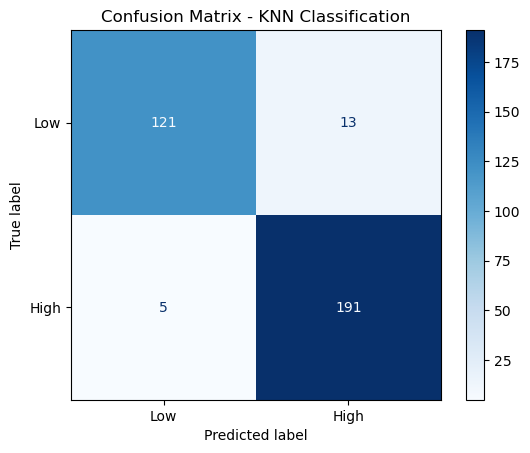

In [45]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN Classification")
plt.show()